In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

In [15]:
#Tech
AAPL = "../data/AAPL_processed_data.csv"
AMZN = "../data/AMZN_processed_data.csv"
GOOG = "../data/GOOG_processed_data.csv"
META = "../data/META_processed_data.csv"
MSFT = "../data/MSFT_processed_data.csv"
NVDA = "../data/NVDA_processed_data.csv"

#Healthcare
ABBV ="../data/ABBV_processed_data.csv"
JNJ = "../data/JNJ_processed_data.csv"
LLY = "../data/LLY_processed_data.csv"
MRK = "../data/MRK_processed_data.csv"
TMO = "../data/TMO_processed_data.csv"
UNH = "../data/UNH_processed_data.csv"

tech_files = [AAPL,AMZN,GOOG,META,MSFT,NVDA]
healthcare_files = [ABBV,JNJ,LLY,MRK,TMO,UNH]
all_stocks = tech_files + healthcare_files

In [16]:
# Define feature columns to be used
features = ['Open', 'High', 'Low', 'Close', 'Volume', 
            '5_day_SMA', '20_day_SMA', '50_day_SMA', 
            '14_day_RSI', 'Lagged_Close', 'ATR', 
            'Day_of_Week', 'Daily_Return']

seq_length = 60

# Function to load and preprocess stock data
def load_and_preprocess_stock(file_path, feature_cols):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    data.sort_values('Date', inplace=True)
    data.ffill(inplace=True)  # Forward fill missing values
    data.bfill(inplace=True)  # Backward fill missing values

    # Extract the features and dates
    feature_data = data[feature_cols].values
    dates = data['Date'].values  # Extract the 'Date' column to align with sequences
    return feature_data, dates, data

In [17]:
# Function to create sequences for LSTM and align dates
def create_sequences(data, dates, seq_length, target_col_index):
    X, y, sequence_dates = [], [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i][target_col_index])  # Use the 'Close' price as target
        sequence_dates.append(dates[i])  # Align date with the target
    return np.array(X), np.array(y), np.array(sequence_dates)

# Temporal train-test split function
def temporal_train_test_split(X, y, dates, test_size=0.2):
    split_index = int(len(X) * (1 - test_size))
    return X[:split_index], X[split_index:], y[:split_index], y[split_index:], dates[:split_index], dates[split_index:]

In [18]:
def build_cnn_lstm_model(input_shape):
    model = Sequential()

    # Add a single Conv1D layer with reduced filters
    model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))  # Optional pooling layer to reduce dimensionality

    # Add LSTM layers (focusing more on LSTM layers like your improved model)
    model.add(LSTM(50, return_sequences=True))  # Reduced to 50 units to prevent overfitting
    model.add(Dropout(0.2))  # Same dropout as in the improved model
    model.add(LSTM(50))
    
    # Dense layers for output
    model.add(Dense(50, activation='relu'))  # Same dense layer as your improved model
    model.add(Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


Processing AAPL...


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
AAPL - MSE: 69.2827, MAE: 6.6187


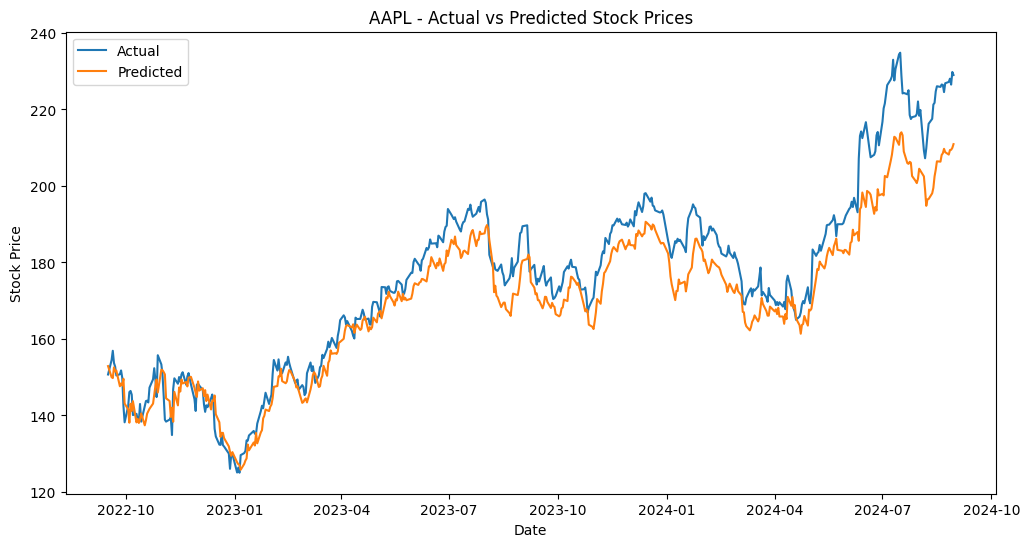

Processing AMZN...


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
AMZN - MSE: 30.5502, MAE: 4.2482


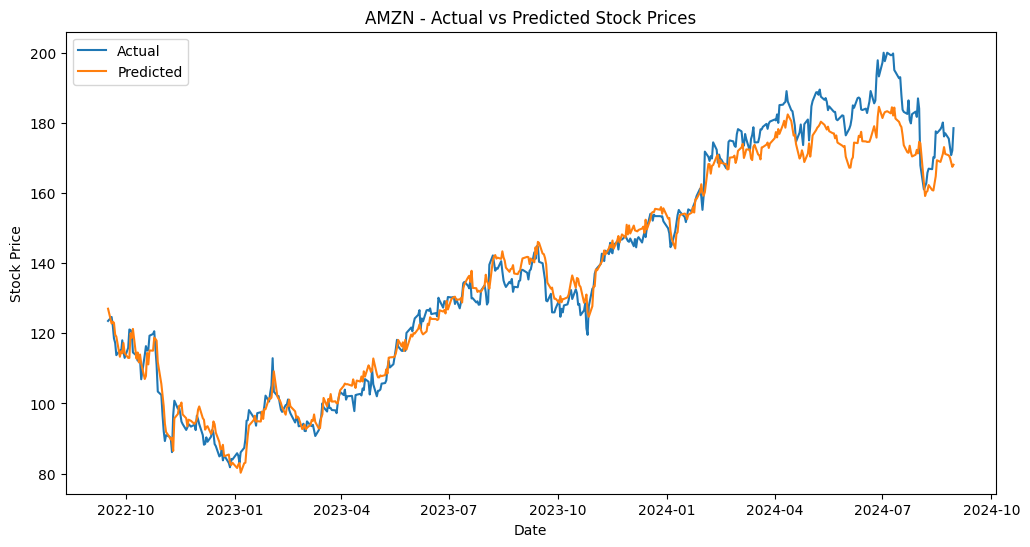

Processing GOOG...


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
GOOG - MSE: 101.3682, MAE: 6.8555


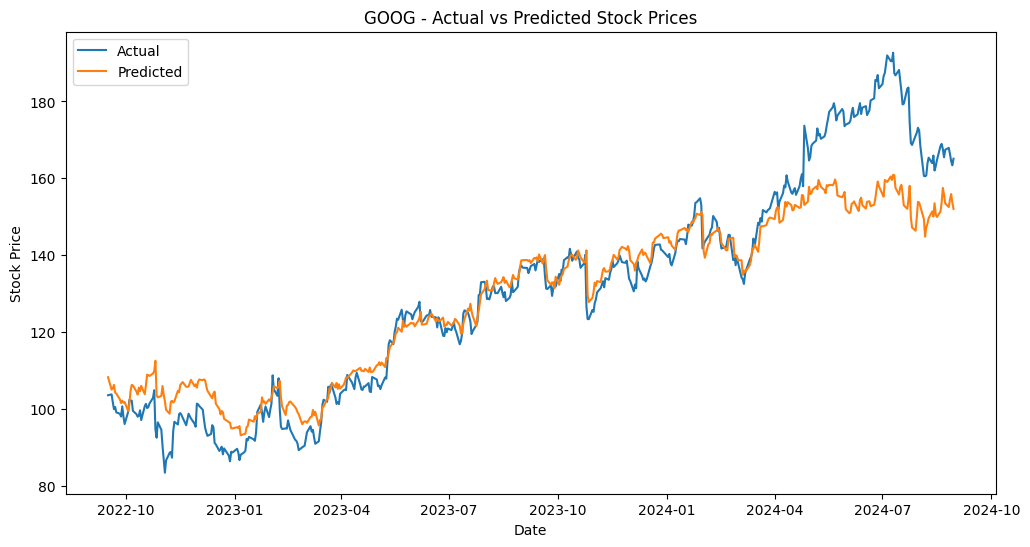

Processing META...


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
META - MSE: 2121.3210, MAE: 29.1702


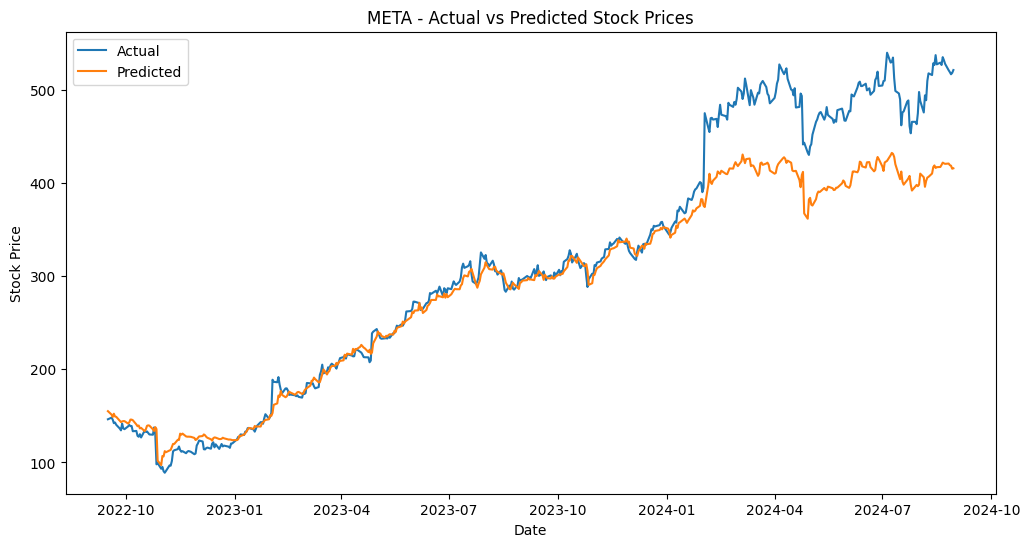

Processing MSFT...


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
MSFT - MSE: 241.6177, MAE: 12.3535


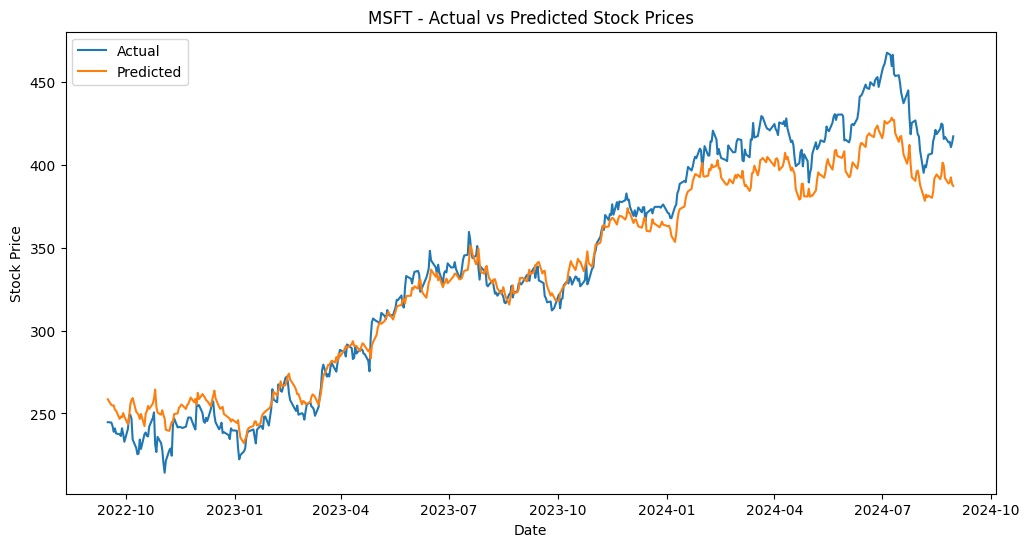

Processing NVDA...


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
NVDA - MSE: 230.8311, MAE: 8.5602


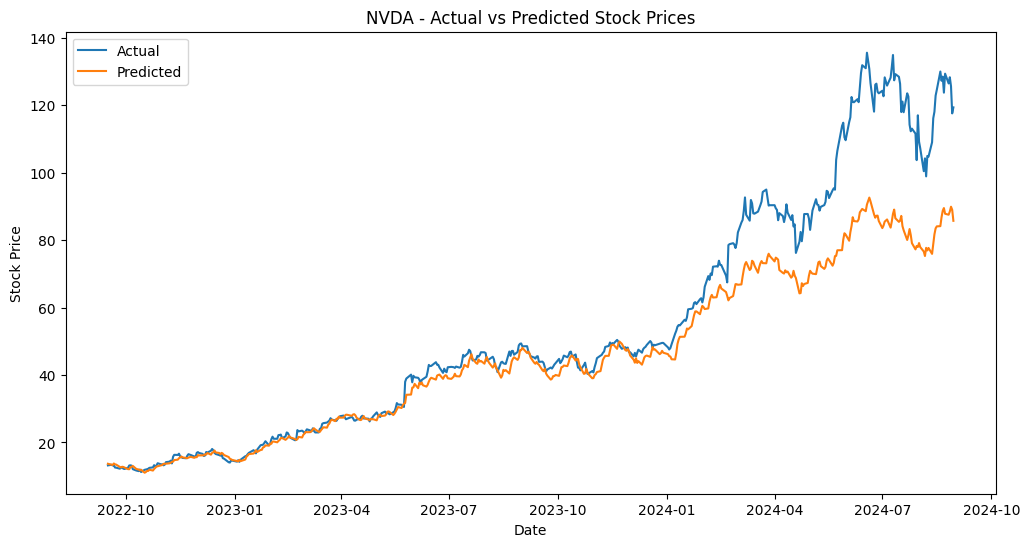

Processing ABBV...


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
ABBV - MSE: 52.9720, MAE: 5.8037


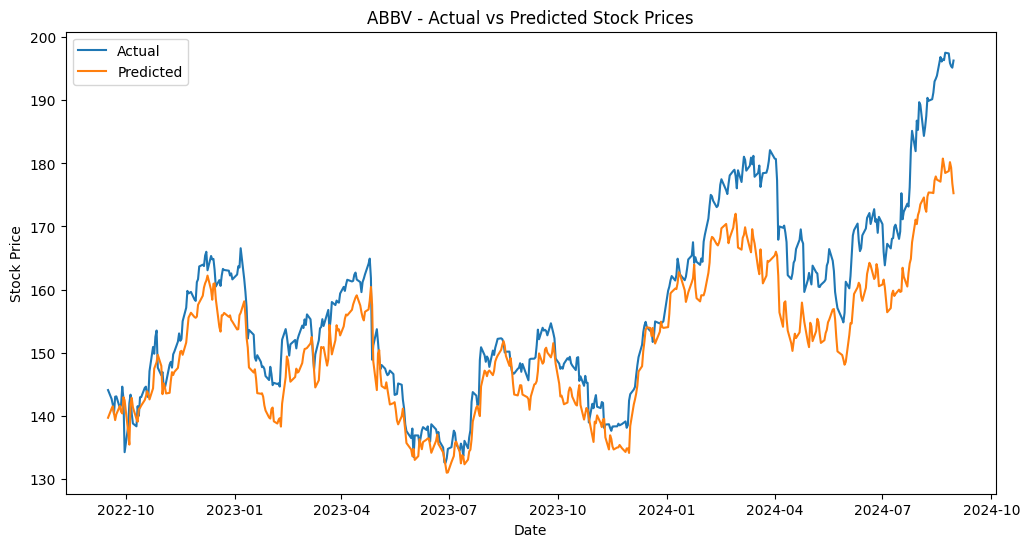

Processing JNJ...


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
JNJ - MSE: 6.2115, MAE: 1.8413


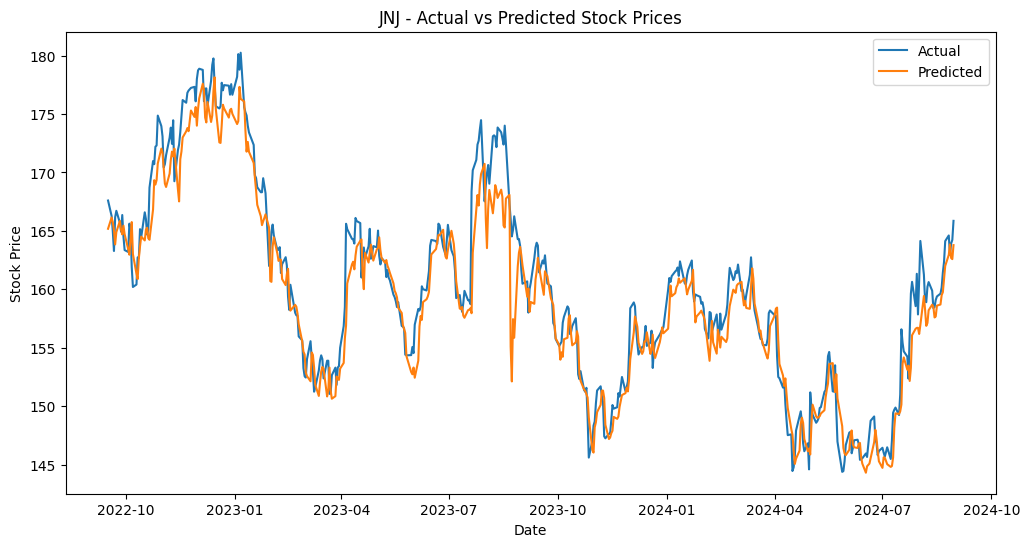

Processing LLY...


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
LLY - MSE: 18598.9343, MAE: 94.5444


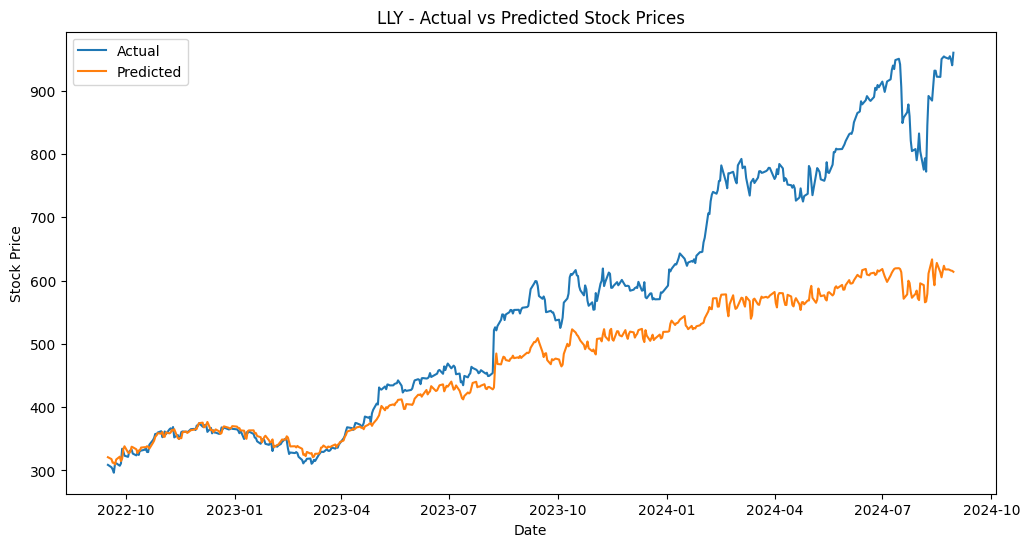

Processing MRK...


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MRK - MSE: 3.9365, MAE: 1.5267


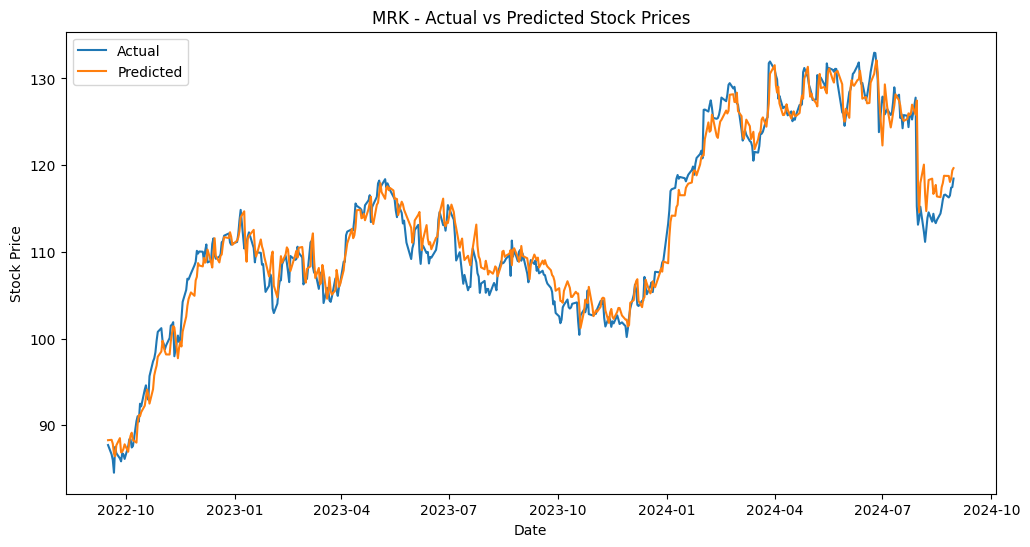

Processing TMO...


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
TMO - MSE: 449.1642, MAE: 18.5872


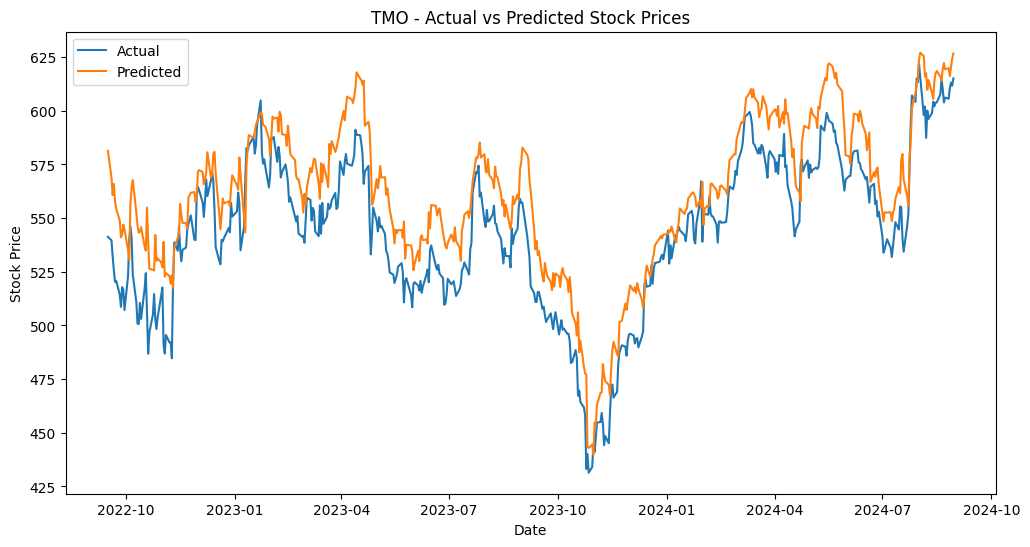

Processing UNH...


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
UNH - MSE: 200.3459, MAE: 11.5113


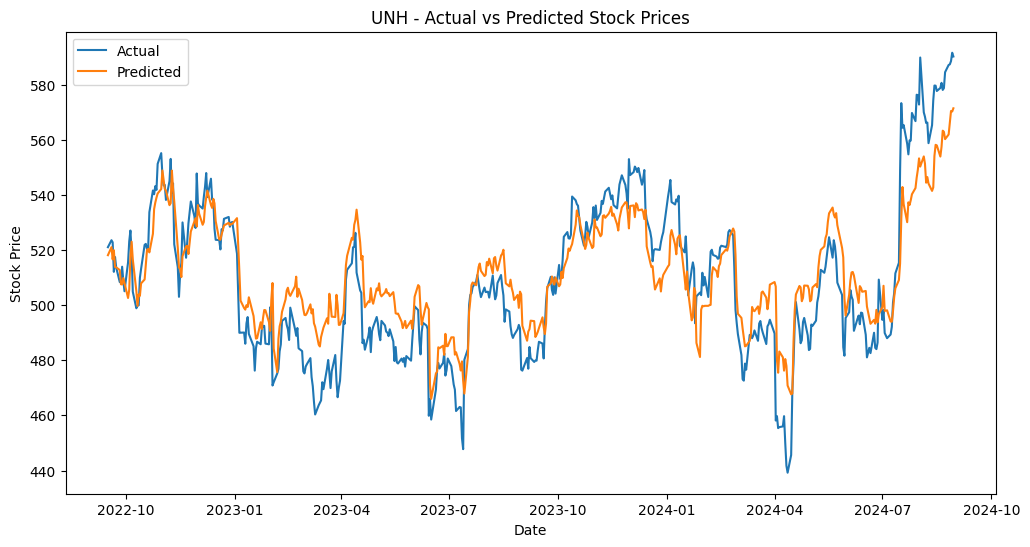

In [19]:
# Assuming the 'Close' price is at index 3 in your features list
target_col_index = features.index('Close')

# Initialize lists to store MAE and RMSE for Tech and Healthcare sectors
mae_tech = []
rmse_tech = []
mae_health = []
rmse_health = []

# Loop over each stock
for stock_file in all_stocks:
    # Extract the stock symbol for labeling
    stock_symbol = stock_file.split('/')[-1].split('_')[0]
    print(f"Processing {stock_symbol}...")

    # Load and preprocess data for the stock
    feature_data, dates, raw_data = load_and_preprocess_stock(stock_file, features)

    # Initialize the scaler
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Fit the scaler on the feature data
    scaled_data = scaler.fit_transform(feature_data)

    # Create sequences and get aligned dates
    X, y, sequence_dates = create_sequences(scaled_data, dates, seq_length, target_col_index)

    # Split the data
    X_train, X_test, y_train, y_test, dates_train, dates_test = temporal_train_test_split(X, y, sequence_dates, test_size=0.2)

    # Get the input shape for the model
    input_shape = (X_train.shape[1], X_train.shape[2])

    # Build the model
    model = build_cnn_lstm_model(input_shape)

    

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=0  # Suppress training output for brevity
    )

    # Make predictions
    y_pred = model.predict(X_test)

    # Inverse transform the predictions and actual values
    # Reconstruct y_test and y_pred to match the scaler's expected input
    y_test_reconstructed = np.zeros((len(y_test), scaled_data.shape[1]))
    y_pred_reconstructed = np.zeros((len(y_pred), scaled_data.shape[1]))

    # Place y_test and y_pred in the correct column
    y_test_reconstructed[:, target_col_index] = y_test
    y_pred_reconstructed[:, target_col_index] = y_pred[:, 0]

    # Inverse transform
    y_test_inv = scaler.inverse_transform(y_test_reconstructed)[:, target_col_index]
    y_pred_inv = scaler.inverse_transform(y_pred_reconstructed)[:, target_col_index]

    # Calculate metrics
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)

    # Collect metrics based on sector
    if stock_file in tech_files:
        mae_tech.append(mae)
        rmse_tech.append(np.sqrt(mse))
    else:
        mae_health.append(mae)
        rmse_health.append(np.sqrt(mse))

    print(f'{stock_symbol} - MSE: {mse:.4f}, MAE: {mae:.4f}')

    # Convert dates to pandas datetime for plotting
    dates_test = pd.to_datetime(dates_test)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(dates_test, y_test_inv, label='Actual')
    plt.plot(dates_test, y_pred_inv, label='Predicted')
    plt.title(f'{stock_symbol} - Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

In [20]:
# Calculate summary statistics for Tech sector
mean_mae_tech = np.mean(mae_tech)
std_mae_tech = np.std(mae_tech)
mean_rmse_tech = np.mean(rmse_tech)
std_rmse_tech = np.std(rmse_tech)

# Calculate summary statistics for Healthcare sector
mean_mae_health = np.mean(mae_health)
std_mae_health = np.std(mae_health)
mean_rmse_health = np.mean(rmse_health)
std_rmse_health = np.std(rmse_health)

# Print comparison of summary statistics
print(f'Tech Sector - MAE: Mean={mean_mae_tech}, Std={std_mae_tech}')
print(f'Tech Sector - RMSE: Mean={mean_rmse_tech}, Std={std_rmse_tech}')

print(f'Healthcare Sector - MAE: Mean={mean_mae_health}, Std={std_mae_health}')
print(f'Healthcare Sector - RMSE: Mean={mean_rmse_health}, Std={std_rmse_health}')


Tech Sector - MAE: Mean=11.301051812879566, Std=8.360172008865696
Tech Sector - RMSE: Mean=16.785667877136152, Std=13.567233878107567
Healthcare Sector - MAE: Mean=22.30243031884802, Std=32.84219141234114
Healthcare Sector - RMSE: Mean=30.580051595218293, Std=47.78550554255891
